# Advanced Econometrics - Home Assignment 2

Karolína Gajdušková
Andrea Rákosníková
Jan Suchánek

# Problem 1

In [16]:
install.packages(c("boot","msm","dplyr")) #We start by installing and loading necessary packages
library(boot)
library(msm)
library(dplyr)
library(broom)

Installing packages into 'C:/Users/Honza/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"packages 'boot', 'msm', 'dplyr' are in use and will not be installed"

In [17]:
library(boot)
data(city)
data <- city
data
#data <- data(city) #we load the data
#data #let's take a look, dataset is so small that we can view it as a whole

u,x
138,143
93,104
61,69
179,260
48,75
37,63
29,50
23,48
30,111
2,50


## a) Draw the dependence between $u_i$ and $x_i$

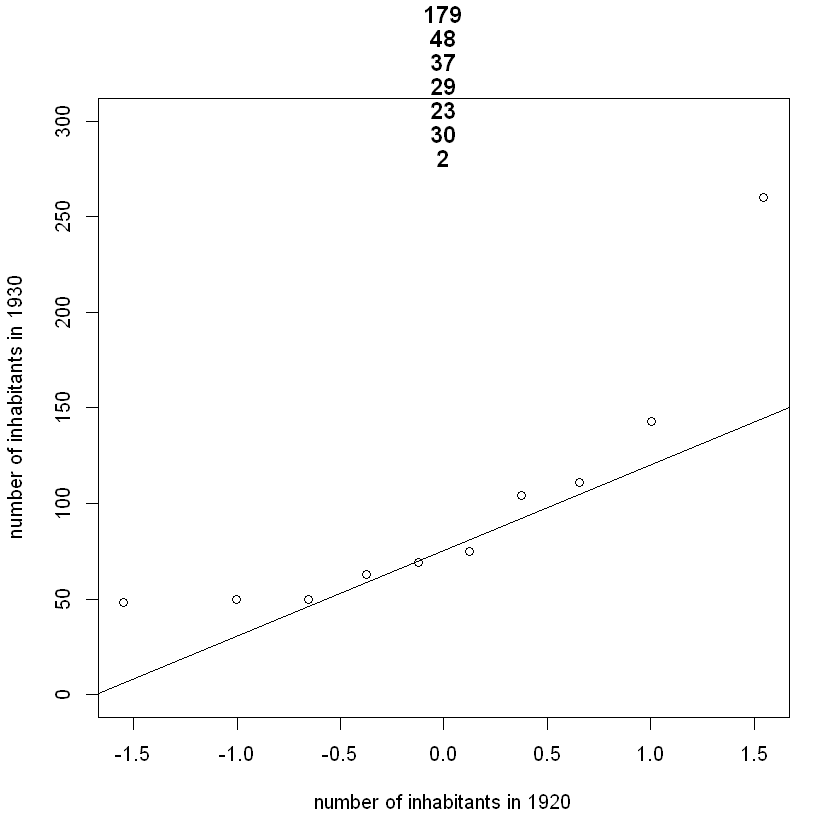

ERROR: Error in ggplot(data, aes(x = x, y = u)): could not find function "ggplot"


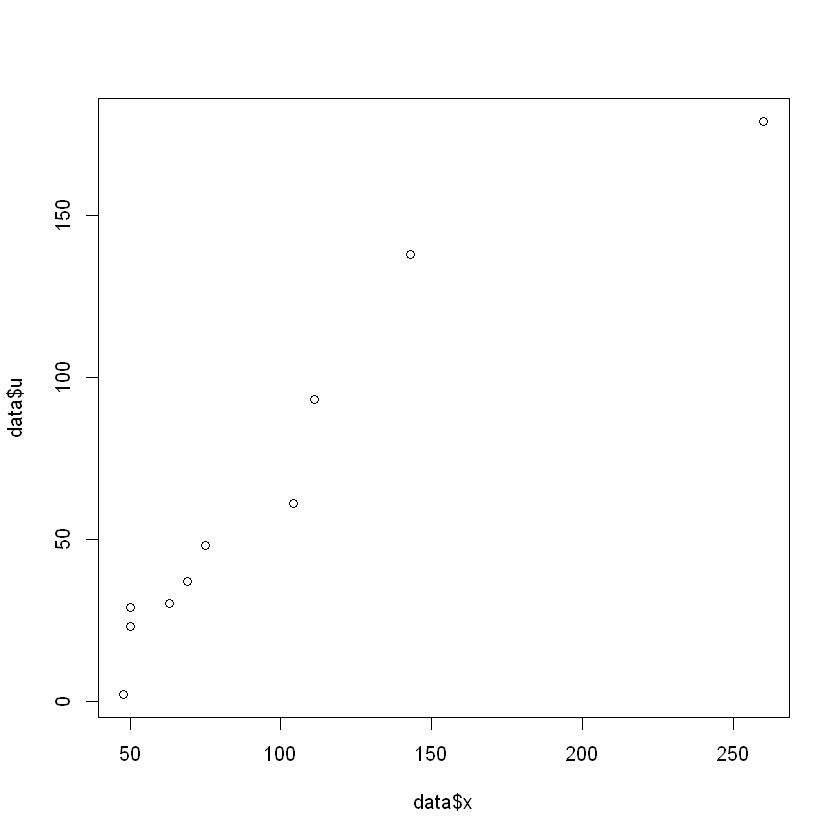

In [18]:
qqnorm(data$x, data$u, ylim = c(0, 300), plot.it = TRUE, xlab = "number of inhabitants in 1920", ylab = "number of inhabitants in 1930")
qqline(data, datax = FALSE)
qqplot(data$x, data$u)
ggplot(data, aes(x = x, y = u)) + geom_point() + geom_smooth()

## b) Estimate the value of R from the random sample.

In [19]:
R = mean(data$x)/mean(data$u)
R

[1] 1.520312

# c)

We start by using "brute force".

We allow for values of x and u to not correspond - clearly wrong

In [20]:
# brute force bootstraping
Boot    = 999
x.boot = rep(0, Boot)
u.boot = rep(0, Boot)

set.seed(42)
for(i in 1:Boot) {
  x.sample <- sample(data$x, nrow(data), replace = TRUE)
  x.boot[i] <- mean(x.sample)
  u.sample <- sample(data$u, nrow(data), replace = TRUE)
  u.boot[i] <- mean(u.sample)
}

In [21]:
g <- x.boot/u.boot
R_bf = mean(g) #bf stands for brute force
sprintf("Bootstrap estimate of R: %.4f", R_bf)

[1] "Bootstrap estimate of R: 1.6453"

values of x and u must correspond - it makes sense

In [42]:
# brute force bootstraping
Boot    = 999
x.boot = rep(0, Boot)
u.boot = rep(0, Boot)

set.seed(42)
for(i in 1:Boot) {
  sample_data <- sample_n(data, nrow(data), replace = TRUE)
  x.boot[i] <- mean(sample_data$x)
  u.boot[i] <- mean(sample_data$u)
}

In [44]:
g <- x.boot/u.boot
R_bf = mean(g) #bf stands for brute force
R_bf_se = sd(g)
sprintf("Bootstrap estimate of R: %.10f", R_bf)
sprintf("Bootstrap standard error for R: %.4f", R_bf_se)

[1] "Bootstrap estimate of R: 1.5595939904"

[1] "Bootstrap standard error for R: 0.2218"

In [69]:
# brute force bootstraping
Boot    = 9999
x.boot = rep(0, Boot)
u.boot = rep(0, Boot)
sample_x = rep(0, nrow(data))
g = rep(0,Boot)
set.seed(42)
for(i in 1:Boot) {
  sample_u <- sample(data$u, nrow(data), replace = TRUE)
  for(a in 1:length(sample_u)) {
      for(b in 1:nrow(data)) {
          if(sample_u[a] == data[b,1]){
              sample_x[a] <- data[b,2]
          }
      }
  }
  x.boot[i] <- mean(sample_x)
  u.boot[i] <- mean(sample_u)
  g[i] <- x.boot[i]/u.boot[i]
}
length(sample_x)
length(sample_u)
sample_u
sample_x

[1] 10

[1] 10

[1]  61 179  30   2  48 138 179 138   2   2

[1]  69 260 111  50  75 143 260 143  50  50

In [70]:
R_bf = mean(g) #bf stands for brute force
R_bf_se = sd(g)
sprintf("Bootstrap estimate of R: %.10f", R_bf)
sprintf("Bootstrap standard error for R: %.4f", R_bf_se)

[1] "Bootstrap estimate of R: 1.5604867270"

[1] "Bootstrap standard error for R: 0.2247"

We continue by using 'boot' package

We allow for values of x and u to not correspond

In [64]:
# now, using the "boot" package
Boot = 999
mean.boot = function(data, idx) {
  datasam <- data[idx,]
  out = mean(datasam$x)/mean(datasam$u)
  #out = mean(data$x[idx])/mean(data$u[idx])
  out
}


set.seed(42)
data.boot <- boot(data, statistic = mean.boot, R = Boot)
summary(data.boot)
data.boot

tidy(data.boot)
tidy(data.boot)[1]+tidy(data.boot)[2]

          Length Class      Mode     
t0          1    -none-     numeric  
t         999    -none-     numeric  
R           1    -none-     numeric  
data        2    data.frame list     
seed      626    -none-     numeric  
statistic   1    -none-     function 
sim         1    -none-     character
call        4    -none-     call     
stype       1    -none-     character
strata     10    -none-     numeric  
weights    10    -none-     numeric  


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = mean.boot, R = Boot)


Bootstrap Statistics :
    original     bias    std. error
t1* 1.520312 0.05498203   0.2531078

statistic,bias,std.error
1.520312,0.05498203,0.2531078


statistic
1.575295


In [20]:
?sample()

In [11]:
?set.seed()

## d) 

We start by computing 95% confidence intervals using normal approximation method:

In [32]:
sprintf("Normal approximation method: 95%% of observations fall between %.3f and %.3f",qnorm(0.025),qnorm(0.975))

[1] "Normal approximation method: 95% of observations fall between -1.960 and 1.960"

We continue by computing 95% confidence intervals using percentile method:

In [53]:
test_stats <- (g - R)/ R_bf_se
qs = quantile(test_stats, probs = c(0.025,0.975))
sprintf("95%%-percent confidence interval using percentile approximation method fall between %.3f and %.3f",qs[[1]],qs[[2]])

[1] "95%-percent confidence interval using percentile approximation method fall between -1.219 and 2.657"

Normal approximation is valid in the case that our variable is symmetrically distributed. That is true up to some point. We can check histogram. But from the left, values are limited by zero (as values are strictly positive) and from right side, there is no restriction. Therefore normal approximation might be valid, but we might rather go with different method.

## e)

$H_0: R = 1$

$H_A: R \neq 1$

Normal approximation method:

In [67]:
# test without refinement
t2 = ((mean(g) - 1) / R_bf_se) # we cannot compare this with std normal distribution => we choose the other approach
sprintf("The test statistics without refinement is %.3f",t2)
sprintf("TThe 95-percent confidence interval is between %.3f and %.3f",qnorm(0.025), qnorm(0.975))

[1] "The test statistics without refinement is 2.443"

[1] "TThe 95-percent confidence interval is between -1.960 and 1.960"

Percentile method:

In [71]:
test_stats_e <- (g-1)/ R_bf_se
qs_e = quantile(test_stats_e, probs = c(0.025,0.975))
sprintf("95%%-percent confidence interval using percentile approximation method fall between %.3f and %.3f",qs_e[[1]],qs_e[[2]])

[1] "95%-percent confidence interval using percentile approximation method fall between 1.125 and 5.076"

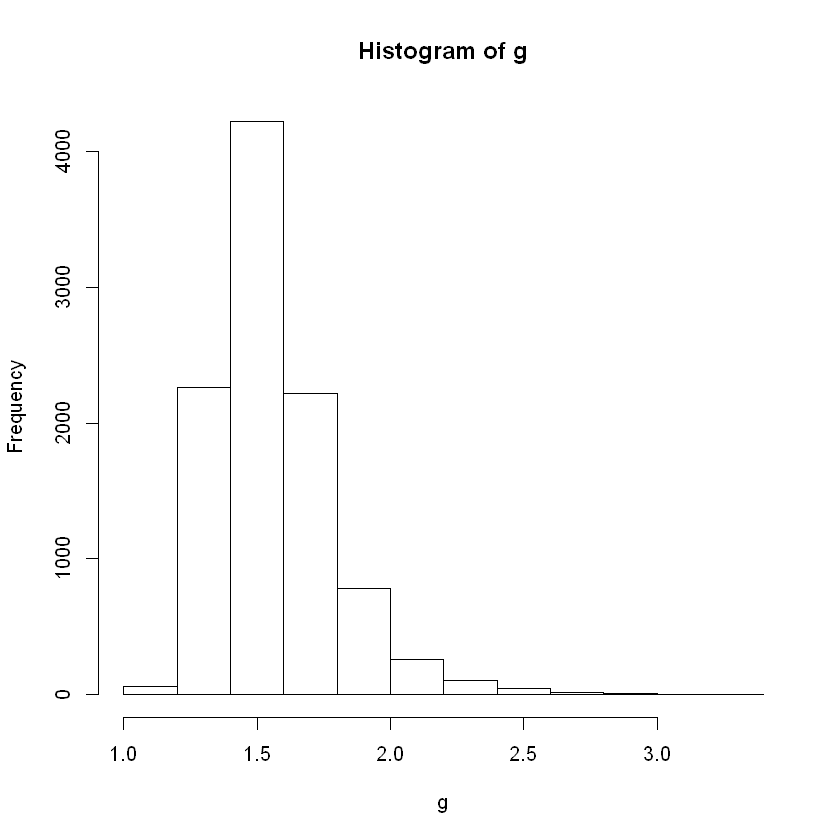

# Problem 3

In [12]:
install.packages(c("readr","tseries","gmm")) #necessary packages
library(readr) #so that we can load the data
library(tseries)
library(gmm)

Installing packages into 'C:/Users/Honza/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readr' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'gmm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Honza\AppData\Local\Temp\RtmpSYgbZm\downloaded_packages


Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'gmm' was built under R version 3.6.3"Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  x = col_double()
)



x
1.1964116
0.9136624
0.7950761
1.8208410
1.5416703
-0.3024855


[1] 1000    1

[1] "numeric"

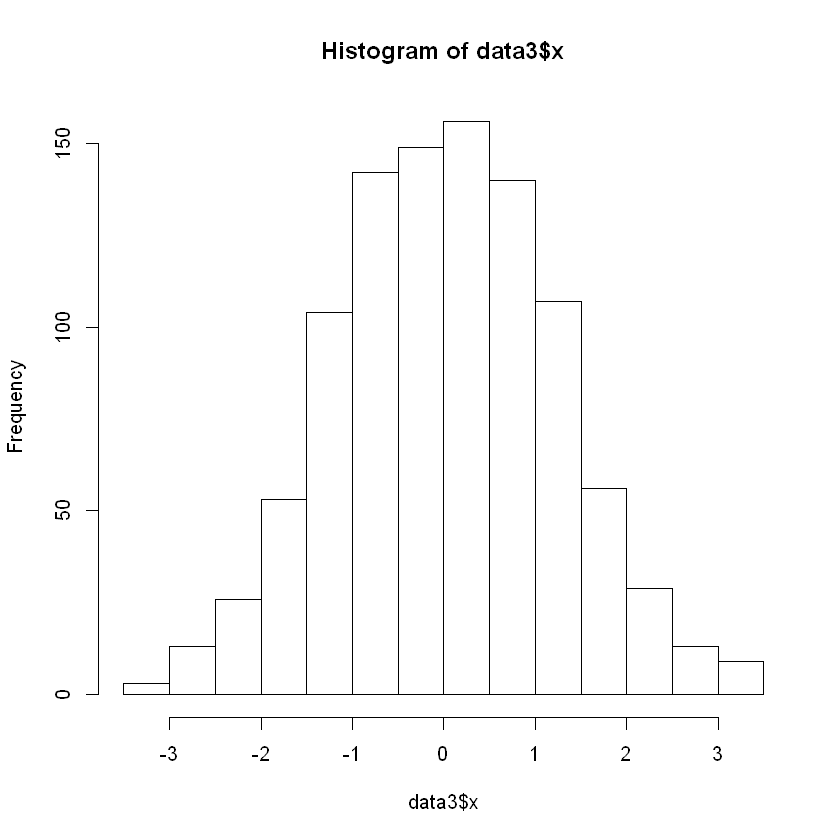

In [65]:
data3 <- read_csv("hw2_data.csv") #load data
head(data3) #check data
dim(data3) #check how big the dataset is
class(data3$x) #what is the class of only variable in the data
hist(data3$x) #histogram - we can see the distribution

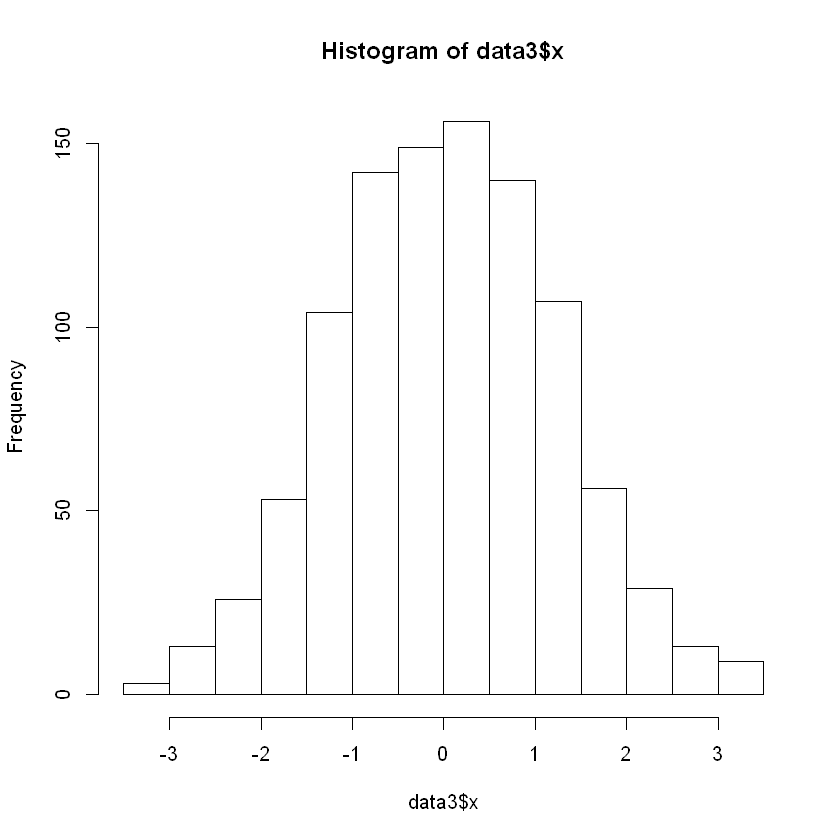